# Instalación de librerías

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carga del Dataset

In [3]:
base_path = "datasets/ucsdped/UCSDped1/Train"

# Listar carpetas de clips
train_clips = sorted(os.listdir(base_path))
print(train_clips)

['.DS_Store', '._.DS_Store', 'Train001', 'Train002', 'Train003', 'Train004', 'Train005', 'Train006', 'Train007', 'Train008', 'Train009', 'Train010', 'Train011', 'Train012', 'Train013', 'Train014', 'Train015', 'Train016', 'Train017', 'Train018', 'Train019', 'Train020', 'Train021', 'Train022', 'Train023', 'Train024', 'Train025', 'Train026', 'Train027', 'Train028', 'Train029', 'Train030', 'Train031', 'Train032', 'Train033', 'Train034']


# Análisis de los datos de entrenamiento

Los datos usados en el conjunto de entrenamiento contienen ***únicamente datos normales***. Recordando el propósito de la detección de anomalías, el objetivo principal no es generar una clasificación entre datos normales y anormales, sino poder definir con precisión, cuales son los límites a los que puede llegar la clase normal, a partir del cual es considerada la presencia de anomalías en las imágenes analizadas. Por tanto, en los datos de entrenamiento se espera que haya riqueza y variedad en cuanto a situaciones consideradas normales para pode establecer bien las fronteras.

En la siguiente imagen se encuentra una muestra de los datos normales

### Muestra inicial

Clips de entrenamiento: 34


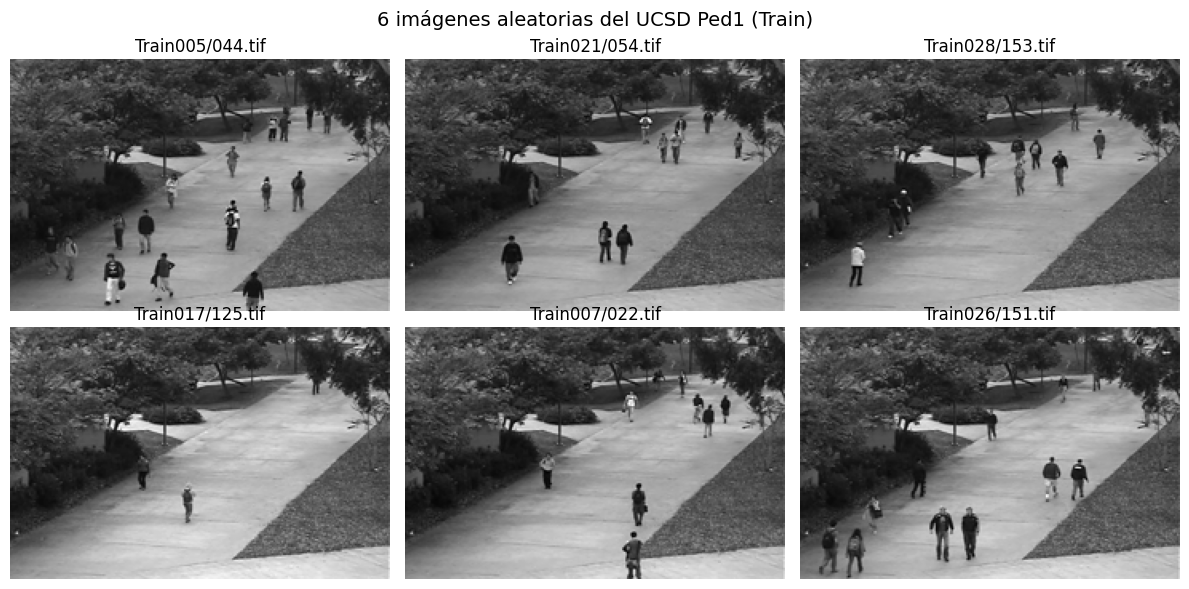

In [4]:
import os
import cv2
import random
import matplotlib.pyplot as plt

# Ruta al dataset (ajusta según tu estructura)
base_path = "datasets/ucsdped/UCSDped1/Train"

# Filtrar solo carpetas válidas (sin .DS_Store, etc.)
train_clips = sorted([
    d for d in os.listdir(base_path)
    if os.path.isdir(os.path.join(base_path, d))
])
print(f"Clips de entrenamiento: {len(train_clips)}")

# Elegir 6 clips o frames aleatorios
sample_images = []

for _ in range(6):
    # Escoger un clip aleatorio
    clip = random.choice(train_clips)
    clip_path = os.path.join(base_path, clip)
    
    # Escoger un frame aleatorio dentro del clip
    frames = sorted([
        f for f in os.listdir(clip_path)
        if f.endswith('.tif')
    ])
    frame = random.choice(frames)
    
    # Leer la imagen
    img_path = os.path.join(clip_path, frame)
    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    
    if img is not None:
        sample_images.append((img, clip, frame))

# Mostrar las 6 imágenes
plt.figure(figsize=(12, 6))
for i, (img, clip, frame) in enumerate(sample_images):
    plt.subplot(2, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{clip}/{frame}")
    plt.axis('off')

plt.suptitle("6 imágenes aleatorias del UCSD Ped1 (Train)", fontsize=14)
plt.tight_layout()
plt.show()


### Estadísticas a nivel de Frame

In [5]:
import os
import cv2
import numpy as np
import pandas as pd

base_path = "datasets/ucsdped/UCSDped1/Train"

# Filtrar carpetas válidas
train_clips = sorted([
    d for d in os.listdir(base_path)
    if os.path.isdir(os.path.join(base_path, d))
])

stats = []

for clip in train_clips:
    clip_path = os.path.join(base_path, clip)
    frames = sorted([
        f for f in os.listdir(clip_path)
        if f.lower().endswith('.tif')
    ])
    
    brightness, contrast = [], []
    for frame in frames:
        frame_path = os.path.join(clip_path, frame)
        img = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)
        
        # Validar que la imagen se haya cargado correctamente
        if img is None:
            print(f"⚠️  No se pudo leer: {frame_path}")
            continue
        
        brightness.append(np.mean(img))
        contrast.append(np.std(img))
    
    if brightness:  # Evitar clips vacíos
        stats.append({
            'clip': clip,
            'mean_brightness': np.mean(brightness),
            'mean_contrast': np.mean(contrast),
            'frames': len(brightness)
        })

df = pd.DataFrame(stats)
print(df.describe())


       mean_brightness  mean_contrast  frames
count        34.000000      34.000000    34.0
mean         95.630619      52.024757   200.0
std           1.874287       1.365256     0.0
min          93.145842      49.119216   200.0
25%          94.015444      51.143769   200.0
50%          94.976215      52.084693   200.0
75%          97.216105      53.121799   200.0
max          98.866074      54.694508   200.0


### Análisis a nivel de Frame

En el siguiente apartado analizaremos las estadísticas generales a nivel de Frame

In [6]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_path = "datasets/ucsdped/UCSDped1/Train"

# Filtrar carpetas válidas
train_clips = sorted([
    d for d in os.listdir(base_path)
    if os.path.isdir(os.path.join(base_path, d))
])

frame_stats = []

for clip in train_clips:
    clip_path = os.path.join(base_path, clip)
    frames = sorted([
        f for f in os.listdir(clip_path)
        if f.lower().endswith('.tif')
    ])
    
    for i, frame in enumerate(frames):
        frame_path = os.path.join(clip_path, frame)
        img = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)
        
        if img is None:
            print(f"⚠️ No se pudo leer: {frame_path}")
            continue
        
        brightness = np.mean(img)
        contrast = np.std(img)
        
        frame_stats.append({
            'clip': clip,
            'frame': i+1,
            'brightness': brightness,
            'contrast': contrast
        })

df_frames = pd.DataFrame(frame_stats)


Con estos datos realizaremos un análisis de las estadísticas principales de las imagenes:

In [7]:
print(df_frames.describe())
print("\nClips analizados:", df_frames['clip'].nunique())

             frame   brightness     contrast
count  6800.000000  6800.000000  6800.000000
mean    100.500000    95.630619    52.024757
std      57.738551     1.954629     1.408609
min       1.000000    92.292017    46.148034
25%      50.750000    93.936629    51.138008
50%     100.500000    95.246330    52.093695
75%     150.250000    97.329293    53.073544
max     200.000000   102.646500    55.993894

Clips analizados: 34


Con estos resultados podemos observar que los cambios entre brillo y contraste de las imágenes son muy bajas a lo largo de todos los videos tomados en los datos de entrenamiento. Lo cual indica que el dataset fue grabado en condiciones de clima e iluminación muy controladas, lo cual puede reducir el rendimiento del modelo en horas nocturnas, o también cuando las condiciones climáticas cambien, porque en este caso, se está considerando también como un factor de normalidad el clima y la iluminación.

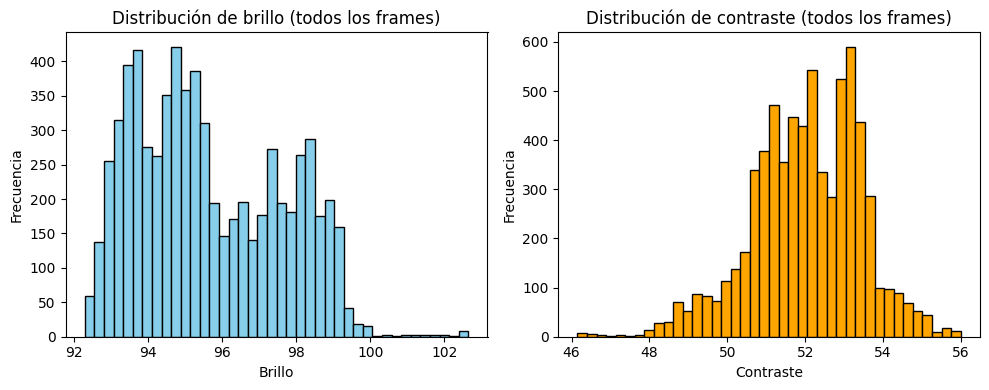

In [8]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(df_frames['brightness'], bins=40, color='skyblue', edgecolor='black')
plt.title('Distribución de brillo (todos los frames)')
plt.xlabel('Brillo')
plt.ylabel('Frecuencia')

plt.subplot(1,2,2)
plt.hist(df_frames['contrast'], bins=40, color='orange', edgecolor='black')
plt.title('Distribución de contraste (todos los frames)')
plt.xlabel('Contraste')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


A partir de esto, se genera una muestra visual que contiene los valores extremos de brillo y contraste, y se compara con una imagen que esté en el promedio de las medidas, y como resultado, las variaciones son muy bajas, o indetectables incluso para un análisis visual

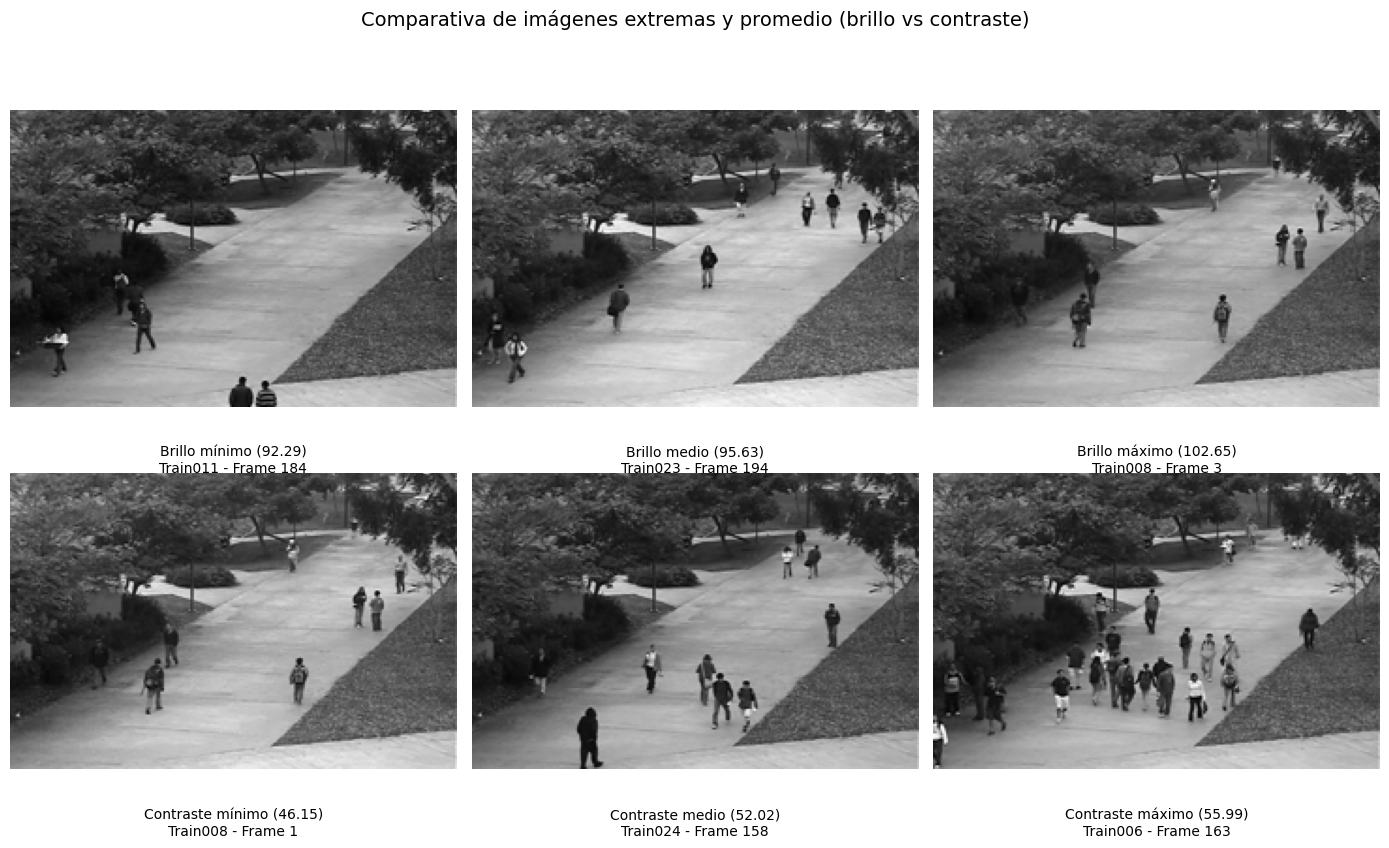

In [9]:
import matplotlib.pyplot as plt
import cv2
import os

# --- Función para cargar un frame específico ---
def load_frame(row):
    clip = row['clip']
    frame_idx = int(row['frame'])
    frame_files = sorted([
        f for f in os.listdir(os.path.join(base_path, clip))
        if f.lower().endswith('.tif')
    ])
    frame_name = frame_files[frame_idx - 1]
    frame_path = os.path.join(base_path, clip, frame_name)
    img = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)
    return img, frame_path

# --- Función auxiliar para seleccionar extremos y promedio ---
def get_extreme_rows(metric):
    min_row = df_frames.loc[df_frames[metric].idxmin()]
    max_row = df_frames.loc[df_frames[metric].idxmax()]
    mean_val = df_frames[metric].mean()
    mean_row = df_frames.iloc[(df_frames[metric] - mean_val).abs().idxmin()]
    return min_row, mean_row, max_row

# --- Obtener los frames para brillo ---
min_brightness, mean_brightness, max_brightness = get_extreme_rows('brightness')

# --- Obtener los frames para contraste ---
min_contrast, mean_contrast, max_contrast = get_extreme_rows('contrast')

# --- Cargar las imágenes ---
imgs_brightness = [load_frame(r)[0] for r in [min_brightness, mean_brightness, max_brightness]]
imgs_contrast   = [load_frame(r)[0] for r in [min_contrast, mean_contrast, max_contrast]]

# --- Configurar la figura 2 filas × 3 columnas ---
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
plt.subplots_adjust(hspace=0.35)  # más espacio entre filas

# --- Datos de texto ---
titles_brightness = [
    f"Brillo mínimo ({min_brightness['brightness']:.2f})\n{min_brightness['clip']} - Frame {min_brightness['frame']}",
    f"Brillo medio ({mean_brightness['brightness']:.2f})\n{mean_brightness['clip']} - Frame {mean_brightness['frame']}",
    f"Brillo máximo ({max_brightness['brightness']:.2f})\n{max_brightness['clip']} - Frame {max_brightness['frame']}"
]

titles_contrast = [
    f"Contraste mínimo ({min_contrast['contrast']:.2f})\n{min_contrast['clip']} - Frame {min_contrast['frame']}",
    f"Contraste medio ({mean_contrast['contrast']:.2f})\n{mean_contrast['clip']} - Frame {mean_contrast['frame']}",
    f"Contraste máximo ({max_contrast['contrast']:.2f})\n{max_contrast['clip']} - Frame {max_contrast['frame']}"
]

# --- Fila 1: BRILLO ---
for ax, img, title in zip(axes[0], imgs_brightness, titles_brightness):
    ax.imshow(img, cmap='gray')
    ax.set_title(title, fontsize=10, y=-0.25)  # el título debajo de la imagen
    ax.axis('off')

# --- Fila 2: CONTRASTE ---
for ax, img, title in zip(axes[1], imgs_contrast, titles_contrast):
    ax.imshow(img, cmap='gray')
    ax.set_title(title, fontsize=10, y=-0.25)  # el título debajo
    ax.axis('off')

# --- Títulos globales ---
axes[0,1].set_ylabel("Brillo", fontsize=12, labelpad=40)
axes[1,1].set_ylabel("Contraste", fontsize=12, labelpad=40)

fig.suptitle("Comparativa de imágenes extremas y promedio (brillo vs contraste)", fontsize=14, y=1.03)
plt.tight_layout()
plt.show()



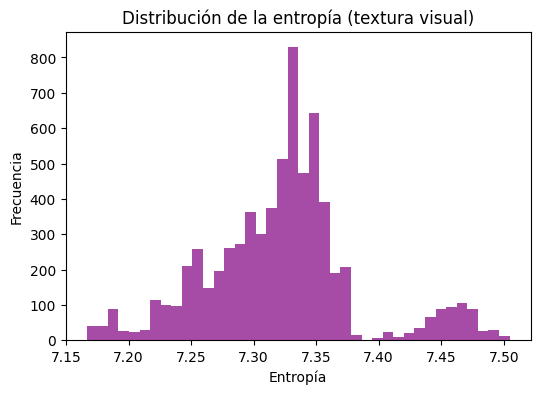

In [16]:
from skimage.measure import shannon_entropy

df_frames['entropy'] = df_frames.apply(lambda row: 
    shannon_entropy(cv2.imread(
        os.path.join(base_path, row['clip'], 
                     sorted([f for f in os.listdir(os.path.join(base_path, row['clip'])) if f.endswith('.tif')])[int(row['frame']) - 1]),
        cv2.IMREAD_GRAYSCALE)
    ), axis=1)

plt.figure(figsize=(6,4))
plt.hist(df_frames['entropy'], bins=40, color='purple', alpha=0.7)
plt.title("Distribución de la entropía (textura visual)")
plt.xlabel("Entropía")
plt.ylabel("Frecuencia")
plt.show()


/tmp/ipykernel_474338/722061028.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


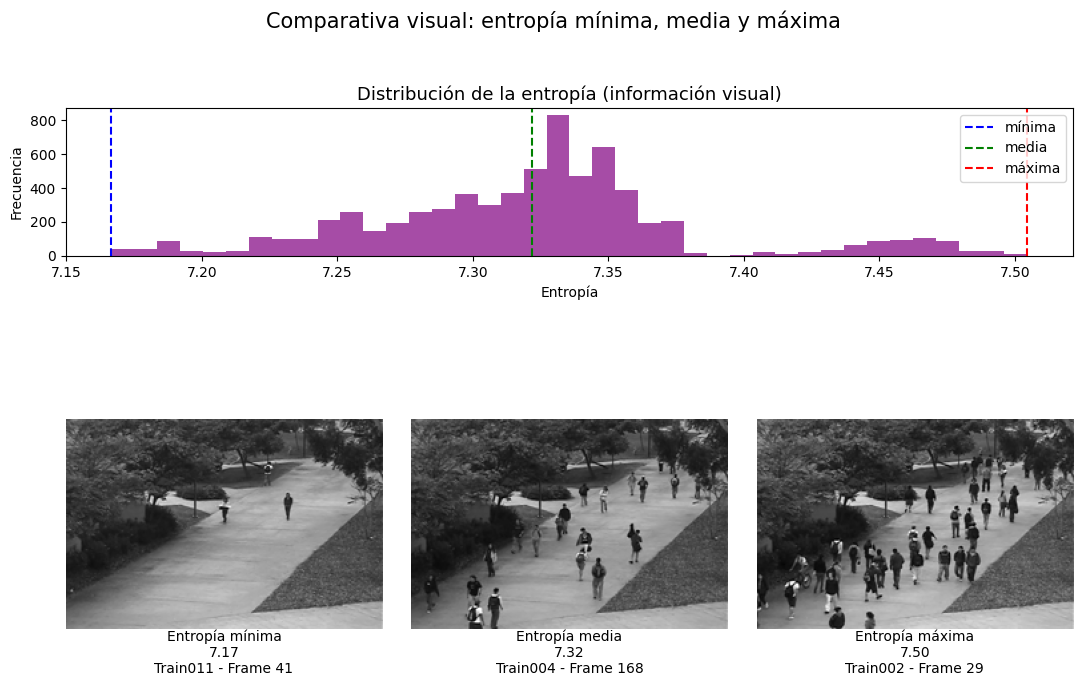

In [11]:
import matplotlib.pyplot as plt
import cv2
import os
from skimage.measure import shannon_entropy

# --- Reusar tus funciones y dataframe previos ---
def load_frame(row):
    clip = row['clip']
    frame_idx = int(row['frame'])
    frame_files = sorted([
        f for f in os.listdir(os.path.join(base_path, clip))
        if f.lower().endswith('.tif')
    ])
    frame_name = frame_files[frame_idx - 1]
    frame_path = os.path.join(base_path, clip, frame_name)
    img = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)
    return img, frame_path

def compute_entropy(row):
    clip = row['clip']
    frame_idx = int(row['frame'])
    frame_files = sorted([
        f for f in os.listdir(os.path.join(base_path, clip))
        if f.lower().endswith('.tif')
    ])
    frame_name = frame_files[frame_idx - 1]
    frame_path = os.path.join(base_path, clip, frame_name)
    img = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return np.nan
    return shannon_entropy(img)

# Calcular entropía si no existe
if 'entropy' not in df_frames.columns:
    df_frames['entropy'] = df_frames.apply(compute_entropy, axis=1)

# --- Seleccionar frames extremos y promedio ---
min_entropy = df_frames.loc[df_frames['entropy'].idxmin()]
max_entropy = df_frames.loc[df_frames['entropy'].idxmax()]
mean_val = df_frames['entropy'].mean()
mean_entropy = df_frames.iloc[(df_frames['entropy'] - mean_val).abs().idxmin()]

imgs = [load_frame(r)[0] for r in [min_entropy, mean_entropy, max_entropy]]
titles = [
    f"Entropía mínima\n{min_entropy['entropy']:.2f}\n{min_entropy['clip']} - Frame {min_entropy['frame']}",
    f"Entropía media\n{mean_entropy['entropy']:.2f}\n{mean_entropy['clip']} - Frame {mean_entropy['frame']}",
    f"Entropía máxima\n{max_entropy['entropy']:.2f}\n{max_entropy['clip']} - Frame {max_entropy['frame']}"
]

# --- Figura mejor balanceada ---
fig = plt.figure(figsize=(13,7))
grid = plt.GridSpec(3, 6, height_ratios=[1.5, 0.1, 2.5], hspace=0.5)

# --- Histograma centrado (ocupa toda la fila superior) ---
ax_hist = fig.add_subplot(grid[0, :])
ax_hist.hist(df_frames['entropy'].dropna(), bins=40, color='purple', alpha=0.7)
ax_hist.axvline(min_entropy['entropy'], color='blue', linestyle='--', label='mínima')
ax_hist.axvline(mean_entropy['entropy'], color='green', linestyle='--', label='media')
ax_hist.axvline(max_entropy['entropy'], color='red', linestyle='--', label='máxima')
ax_hist.set_title("Distribución de la entropía (información visual)", fontsize=13)
ax_hist.set_xlabel("Entropía")
ax_hist.set_ylabel("Frecuencia")
ax_hist.legend()

# --- Imágenes centradas en la fila inferior (ocupan columnas 2-4-6 del grid) ---
positions = [0, 2, 4]
for pos, (img, title) in zip(positions, zip(imgs, titles)):
    ax = fig.add_subplot(grid[2, pos:pos+2])  # cada imagen usa 2 columnas
    ax.imshow(img, cmap='gray')
    ax.set_title(title, fontsize=10, y=-0.25)
    ax.axis('off')

fig.suptitle("Comparativa visual: entropía mínima, media y máxima", fontsize=15, y=1.02)
plt.tight_layout()
plt.show()


## Análisis de la distribución espacial del movimiento

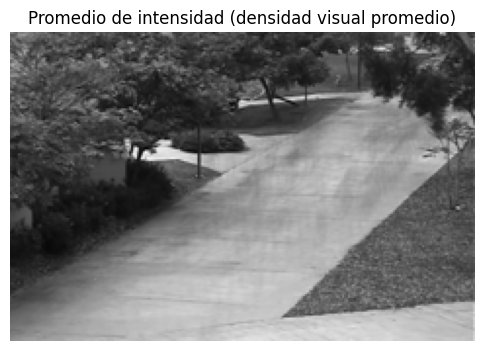

In [12]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

clip_path = os.path.join(base_path, "Train001")  # usa uno de tus clips
frames = sorted([f for f in os.listdir(clip_path) if f.endswith('.tif')])

# Acumular todos los frames
acc = None
for f in frames:
    img = cv2.imread(os.path.join(clip_path, f), cv2.IMREAD_GRAYSCALE).astype(np.float32)
    acc = img if acc is None else acc + img

avg_img = acc / len(frames)

plt.figure(figsize=(6,5))
plt.imshow(avg_img, cmap='gray')
plt.title("Promedio de intensidad (densidad visual promedio)")
plt.axis('off')
plt.show()


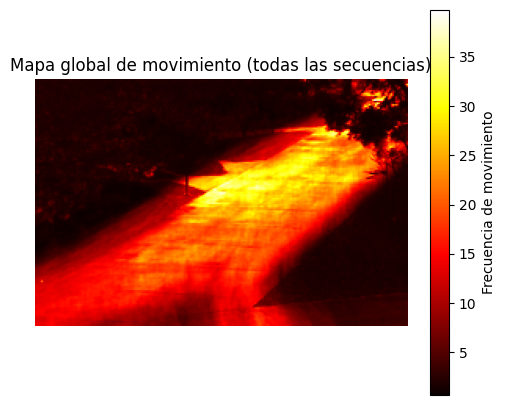

In [15]:
global_acc = None
for clip in train_clips:
    clip_path = os.path.join(base_path, clip)
    frames = sorted([f for f in os.listdir(clip_path) if f.endswith('.tif')])
    
    stack = np.array([
        cv2.imread(os.path.join(clip_path, f), cv2.IMREAD_GRAYSCALE)
        for f in frames
    ])
    
    clip_motion = np.std(stack, axis=0)
    global_acc = clip_motion if global_acc is None else global_acc + clip_motion

global_motion_map = global_acc / len(train_clips)

plt.figure(figsize=(6,5))
plt.imshow(global_motion_map, cmap='hot')
plt.title("Mapa global de movimiento (todas las secuencias)")
plt.axis('off')
plt.colorbar(label='Frecuencia de movimiento')
plt.show()


# Análisis datos de testeo

Revisaremos la ubicación espacial dentro de la imagen en la cual es muy propenso de que se presenten las anomalías detectadas.

In [30]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

base_train = "datasets/ucsdped/UCSDped1/Train"

train_clips = sorted([
    d for d in os.listdir(base_train)
    if os.path.isdir(os.path.join(base_train, d))
])

avg_bg = None
total_frames = 0

for clip in train_clips:
    clip_path = os.path.join(base_train, clip)
    frames = sorted([f for f in os.listdir(clip_path) if f.endswith('.tif')])
    for f in frames:
        img = cv2.imread(os.path.join(clip_path, f), cv2.IMREAD_GRAYSCALE).astype(np.float32)
        if avg_bg is None:
            avg_bg = np.zeros_like(img, dtype=np.float32)
        avg_bg += img
        total_frames += 1

avg_bg /= total_frames


In [31]:
base_test = "datasets/ucsdped/UCSDped1/Test"

gt_folders = sorted([
    d for d in os.listdir(base_test)
    if d.endswith("_gt") and os.path.isdir(os.path.join(base_test, d))
])

acc_mask_global = None
total_masks = 0

for gt_folder in gt_folders:
    gt_path = os.path.join(base_test, gt_folder)
    frames_gt = sorted([f for f in os.listdir(gt_path) if f.endswith(".bmp")])

    for m in frames_gt:
        mask = cv2.imread(os.path.join(gt_path, m), cv2.IMREAD_GRAYSCALE)
        if mask is None:
            continue
        mask_bin = (mask > 0).astype(np.float32)
        if acc_mask_global is None:
            acc_mask_global = np.zeros_like(mask_bin, dtype=np.float32)
        acc_mask_global += mask_bin
        total_masks += 1

acc_mask_global /= total_masks


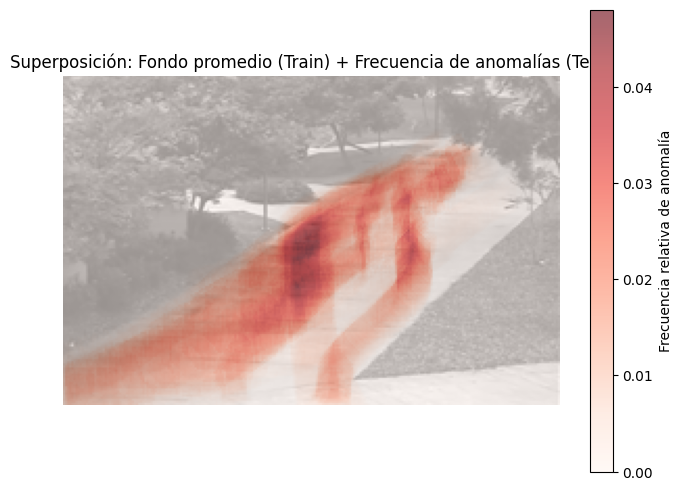

In [32]:
plt.figure(figsize=(8,6))

plt.imshow(avg_bg, cmap='gray')
plt.imshow(acc_mask_global, cmap='Reds', alpha=0.6)  # superposición semitransparente
plt.title("Superposición: Fondo promedio (Train) + Frecuencia de anomalías (Test)")
plt.axis('off')
plt.colorbar(label="Frecuencia relativa de anomalía")
plt.show()


## Detección de los eventos anómalos

En la siguiente imagen podemos observar algunas muestras de las anomalías que se están reportando. En este caso, están relacionadas con la presencia de automoviles, sillas de ruedas, carros de aseo, patienetas, etc

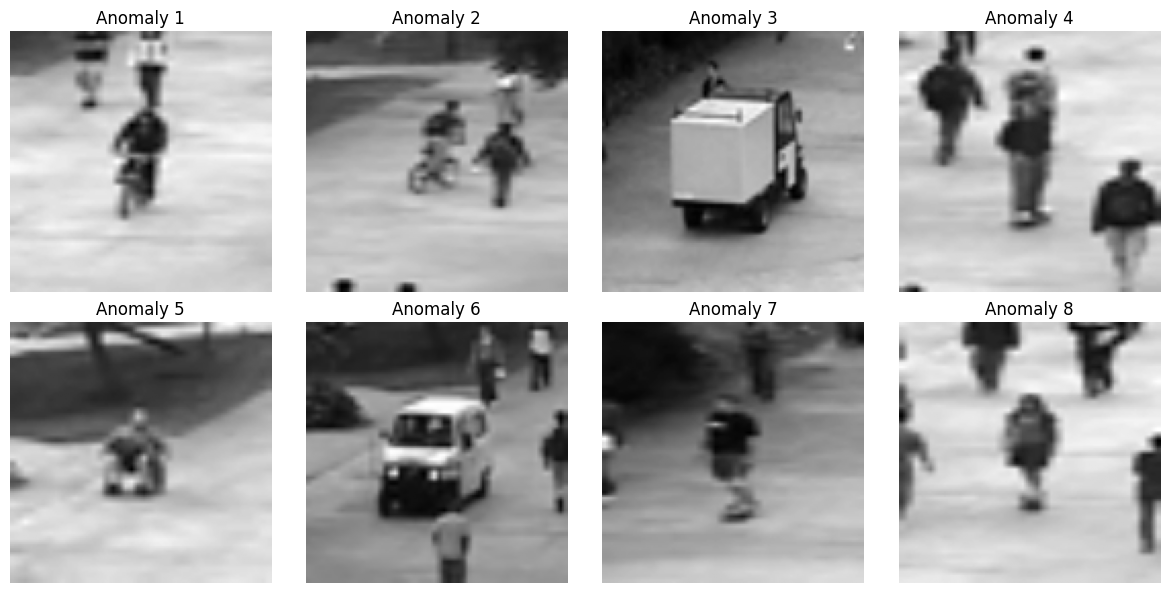

In [36]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

base_test = "datasets/ucsdped/UCSDped1/Test"

# Carpetas *_gt (ground truth)
gt_folders = sorted([
    d for d in os.listdir(base_test)
    if d.endswith("_gt") and os.path.isdir(os.path.join(base_test, d))
])

anomaly_samples = []
context_margin = 15  # píxeles extra alrededor del bounding box

for gt_folder in gt_folders:
    clip_name = gt_folder.replace("_gt", "")
    clip_path = os.path.join(base_test, clip_name)
    gt_path = os.path.join(base_test, gt_folder)

    if not os.path.exists(clip_path):
        continue

    frames = sorted([f for f in os.listdir(clip_path) if f.endswith(".tif")])
    masks = sorted([f for f in os.listdir(gt_path) if f.endswith(".bmp")])
    n_frames = min(len(frames), len(masks))

    for i in range(n_frames):
        frame = cv2.imread(os.path.join(clip_path, frames[i]), cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(os.path.join(gt_path, masks[i]), cv2.IMREAD_GRAYSCALE)
        if frame is None or mask is None:
            continue

        mask_bin = (mask > 0).astype(np.uint8)
        if np.sum(mask_bin) == 0:
            continue

        contours, _ = cv2.findContours(mask_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            if w * h < 50:  # evitar ruido
                continue

            # Expandir el recorte con un margen
            x1 = max(0, x - context_margin)
            y1 = max(0, y - context_margin)
            x2 = min(frame.shape[1], x + w + context_margin)
            y2 = min(frame.shape[0], y + h + context_margin)

            crop = frame[y1:y2, x1:x2]
            anomaly_samples.append(crop)

# Tomar 8 muestras aleatorias si hay suficientes
random.shuffle(anomaly_samples)
sample_count = min(8, len(anomaly_samples))
samples_to_show = anomaly_samples[:sample_count]

# Mostrar resultados
if samples_to_show:
    cols = 4
    rows = int(np.ceil(sample_count / cols))
    plt.figure(figsize=(12, 6))
    for i, img in enumerate(samples_to_show):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(cv2.resize(img, (128, 128)), cmap='gray')  # reescalar para mejor visibilidad
        plt.axis('off')
        plt.title(f"Anomaly {i+1}")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No se detectaron anomalías. Revisa las máscaras *_gt.")
